# Internet Prices (EDA)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
df= pd.read_csv('internet prices.csv')

### Printing the Dataset

In [3]:
df

,S.NO,Country code,Country,Continental region,NO. OF Internet Plans,Average price of 1GB (Rs),Cheapest 1GB for 30 days (Rs),Most expensive 1GB (Rs),Average price of 1GB (Rs at start of 2021),Average price of 1GB (Rs at start of 2020),Internet users,Population,Avg \n(Mbit/s)Ookla
0,0.0,IL,Israel,NEAR EAST,27.0,4.0620,1.6248,1701.9780,8.9364,73.1160,6788737.0,8381516.0,28.01
1,1.0,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,12.1860,8.1240,575.1792,17.0604,21.9348,2309235.0,6304030.0,16.30
2,2.0,FJ,Fiji,OCEANIA,18.0,15.4356,4.0620,69.0540,47.9316,290.0268,452479.0,883483.0,25.99
3,3.0,IT,Italy,WESTERN EUROPE,29.0,21.9348,7.3116,287.5896,34.9332,140.5452,50540000.0,60627291.0,37.15
4,4.0,SD,Sudan,SUB-SAHARAN AFRICA,33.0,21.9348,2.4372,74.7408,51.1812,55.2432,12512639.0,41801533.0,9.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,239.0,VA,Vatican City (Holy See),Europe,NaN,#VALUE!,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN
238,240.0,VE,Venezuela,SOUTH AMERICA,NaN,#VALUE!,0.0000,0.0000,0.0000,0.0000,20564451.0,28887118.0,5.68
239,241.0,WF,Wallis and Futuna,OCEANIA,NaN,#VALUE!,0.0000,0.0000,0.0000,0.0000,1383.0,11661.0,NaN
240,242.0,CD,Democratic Republic of the Congo,SUB-SAHARAN AFRICA,NaN,#VALUE!,0.0000,0.0000,0.0000,0.0000,7011507.0,84068091.0,12.08


### List the columns Present in the Dataset

In [4]:
df.columns

Index(['S.NO', 'Country code', 'Country', 'Continental region',
       'NO. OF Internet Plans', 'Average price of 1GB (Rs)',
       'Cheapest 1GB for 30 days (Rs)', 'Most expensive 1GB (Rs)',
       'Average price of 1GB (Rs at start of 2021)',
       'Average price of 1GB (Rs at start of 2020)', 'Internet users',
       'Population', 'Avg \n(Mbit/s)Ookla'],
      dtype='object')

### Dropping the Features of the dataset to clean the dataset

In [5]:
df.drop(['S.NO','Country code'],axis=1,inplace=True)

#### Here we have dropped :-
* S.NO
* Country code

### Renaming Columns.

In [6]:
df.rename(columns={'Continental region':'Region','Avg \n(Mbit/s)Ookla':'Avg Speed'},inplace=True)

#### Here we have renamed the following columns: 
* 'Continental region' to 'Region'
* 'Avg \n(Mbit/s)Ookla' to 'Avg Speed'

### To check is there any null values present in the dataset

In [7]:
df.isnull().sum()

Country                                         0
Region                                          0
NO. OF Internet Plans                          11
Average price of 1GB (Rs)                       0
Cheapest 1GB for 30 days (Rs)                   0
Most expensive 1GB (Rs)                         0
Average price of 1GB (Rs at start of 2021)      0
Average price of 1GB (Rs at start of 2020)      0
Internet users                                 30
Population                                     32
Avg Speed                                     101
dtype: int64

In [8]:
df.isnull().sum().sum()

174

* There are total 174 null values present in the dataset.

### Dropping the null values from the dataset

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum().sum()

0

* There are no more null values present in the dataset.

### Print the cleaned Dataset.

In [11]:
df

,Country,Region,NO. OF Internet Plans,Average price of 1GB (Rs),Cheapest 1GB for 30 days (Rs),Most expensive 1GB (Rs),Average price of 1GB (Rs at start of 2021),Average price of 1GB (Rs at start of 2020),Internet users,Population,Avg Speed
0,Israel,NEAR EAST,27.0,4.0620,1.6248,1701.9780,8.9364,73.1160,6788737.0,8381516.0,28.01
1,Kyrgyzstan,CIS (FORMER USSR),20.0,12.1860,8.1240,575.1792,17.0604,21.9348,2309235.0,6304030.0,16.30
2,Fiji,OCEANIA,18.0,15.4356,4.0620,69.0540,47.9316,290.0268,452479.0,883483.0,25.99
3,Italy,WESTERN EUROPE,29.0,21.9348,7.3116,287.5896,34.9332,140.5452,50540000.0,60627291.0,37.15
4,Sudan,SUB-SAHARAN AFRICA,33.0,21.9348,2.4372,74.7408,51.1812,55.2432,12512639.0,41801533.0,9.50
...,...,...,...,...,...,...,...,...,...,...,...
211,Czech Republic,EASTERN EUROPE,34.0,662.1060,76.3656,2928.7020,645.8580,2657.3604,8358728.0,10665677.0,44.55
212,Greece,WESTERN EUROPE,22.0,662.9184,86.1144,62462.9988,979.7544,398.8884,7923438.0,10522246.0,59.42
214,Cyprus,NEAR EAST,22.0,718.1616,167.3544,4801.2840,1101.6144,1645.1100,952369.0,1189265.0,75.48
221,Yemen,NEAR EAST,17.0,1298.2152,32.4960,3244.7256,1298.2152,1277.9052,7548512.0,28498683.0,16.89


#### From the above dataset we can describe :
    * The above dataset provides us the information about the World Wide Internet Services for the year (2020-21).
    * Country/Region -- Regionwice Country names.
    * No. of Internet Plans each Country has.
    * Total Population and Internet users in each Country.
    * Average speed of internet in each country.
    
##### Price related information :
    * Average price of 1GB (Rs)
    * Cheapest 1GB for 30 days (Rs)	
    * Most expensive 1GB (Rs)	
    * Average price of 1GB (Rs at the start of 2021)	
    * Average price of 1GB (Rs at start of 2020)

### Check the no. of Rows and Columns

In [12]:
df.shape

(136, 11)

* There are 11 Features in the Dataset
* 136 Attributes are present the Dataset

### Round-off the decimal places

In [13]:
df=df.round(2)

In [14]:
df

,Country,Region,NO. OF Internet Plans,Average price of 1GB (Rs),Cheapest 1GB for 30 days (Rs),Most expensive 1GB (Rs),Average price of 1GB (Rs at start of 2021),Average price of 1GB (Rs at start of 2020),Internet users,Population,Avg Speed
0,Israel,NEAR EAST,27.0,4.0620,1.62,1701.98,8.9364,73.1160,6788737.0,8381516.0,28.01
1,Kyrgyzstan,CIS (FORMER USSR),20.0,12.1860,8.12,575.18,17.0604,21.9348,2309235.0,6304030.0,16.30
2,Fiji,OCEANIA,18.0,15.4356,4.06,69.05,47.9316,290.0268,452479.0,883483.0,25.99
3,Italy,WESTERN EUROPE,29.0,21.9348,7.31,287.59,34.9332,140.5452,50540000.0,60627291.0,37.15
4,Sudan,SUB-SAHARAN AFRICA,33.0,21.9348,2.44,74.74,51.1812,55.2432,12512639.0,41801533.0,9.50
...,...,...,...,...,...,...,...,...,...,...,...
211,Czech Republic,EASTERN EUROPE,34.0,662.1060,76.37,2928.70,645.8580,2657.3604,8358728.0,10665677.0,44.55
212,Greece,WESTERN EUROPE,22.0,662.9184,86.11,62463.00,979.7544,398.8884,7923438.0,10522246.0,59.42
214,Cyprus,NEAR EAST,22.0,718.1616,167.35,4801.28,1101.6144,1645.1100,952369.0,1189265.0,75.48
221,Yemen,NEAR EAST,17.0,1298.2152,32.50,3244.73,1298.2152,1277.9052,7548512.0,28498683.0,16.89


### To print the first 5 records of the dataset

In [15]:
df.head()

,Country,Region,NO. OF Internet Plans,Average price of 1GB (Rs),Cheapest 1GB for 30 days (Rs),Most expensive 1GB (Rs),Average price of 1GB (Rs at start of 2021),Average price of 1GB (Rs at start of 2020),Internet users,Population,Avg Speed
0,Israel,NEAR EAST,27.0,4.0620,1.62,1701.98,8.9364,73.1160,6788737.0,8381516.0,28.01
1,Kyrgyzstan,CIS (FORMER USSR),20.0,12.1860,8.12,575.18,17.0604,21.9348,2309235.0,6304030.0,16.30
2,Fiji,OCEANIA,18.0,15.4356,4.06,69.05,47.9316,290.0268,452479.0,883483.0,25.99
3,Italy,WESTERN EUROPE,29.0,21.9348,7.31,287.59,34.9332,140.5452,50540000.0,60627291.0,37.15
4,Sudan,SUB-SAHARAN AFRICA,33.0,21.9348,2.44,74.74,51.1812,55.2432,12512639.0,41801533.0,9.50


### To print last 5 records of the dataset

In [16]:
df.tail()

,Country,Region,NO. OF Internet Plans,Average price of 1GB (Rs),Cheapest 1GB for 30 days (Rs),Most expensive 1GB (Rs),Average price of 1GB (Rs at start of 2021),Average price of 1GB (Rs at start of 2020),Internet users,Population,Avg Speed
211,Czech Republic,EASTERN EUROPE,34.0,662.1060,76.37,2928.70,645.8580,2657.3604,8358728.0,10665677.0,44.55
212,Greece,WESTERN EUROPE,22.0,662.9184,86.11,62463.00,979.7544,398.8884,7923438.0,10522246.0,59.42
214,Cyprus,NEAR EAST,22.0,718.1616,167.35,4801.28,1101.6144,1645.1100,952369.0,1189265.0,75.48
221,Yemen,NEAR EAST,17.0,1298.2152,32.50,3244.73,1298.2152,1277.9052,7548512.0,28498683.0,16.89
226,Malawi,SUB-SAHARAN AFRICA,5.0,2068.3704,1654.86,2068.37,2226.7884,291.6516,2566126.0,18143217.0,17.95


## Print the info of the Dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 226
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     136 non-null    object 
 1   Region                                      136 non-null    object 
 2   NO. OF Internet Plans                       136 non-null    float64
 3   Average price of 1GB (Rs)                   136 non-null    object 
 4   Cheapest 1GB for 30 days (Rs)               136 non-null    float64
 5   Most expensive 1GB (Rs)                     136 non-null    float64
 6   Average price of 1GB (Rs at start of 2021)  136 non-null    object 
 7   Average price of 1GB (Rs at start of 2020)  136 non-null    object 
 8   Internet users                              136 non-null    float64
 9   Population                                  136 non-null    float64
 10  Avg Speed     

### Print Statistical information about the dataset

In [18]:
df.describe().round(1)

,NO. OF Internet Plans,Cheapest 1GB for 30 days (Rs),Most expensive 1GB (Rs),Internet users,Population,Avg Speed
count,136.0,136.0,136.0,1.360000e+02,1.360000e+02,136.0
mean,32.7,57.0,2131.2,3.596039e+07,5.314574e+07,38.0
std,16.5,147.6,5634.2,1.171520e+08,1.722347e+08,28.8
min,3.0,0.0,69.0,1.022850e+05,1.058450e+05,5.5
25%,19.8,9.8,402.3,2.368956e+06,4.956949e+06,17.0
50%,28.0,23.2,788.0,6.532940e+06,1.123066e+07,28.2
75%,45.0,69.3,1964.2,2.195866e+07,3.927558e+07,49.8
max,60.0,1654.9,62463.0,1.010740e+09,1.427648e+09,135.4


#### From the above data we can conclude :-
* The Most Expensive 1GB data cost Rs. 62463.0.
* The maximum Average internet speed is 135.4(Mbps) offered by a Country.
* The minimum Average internet speed is 5.5(Mbps) offered by a Country

## Sorting Data

In [19]:
df.sort_values(['Internet users'],ascending=False).head(3)

,Country,Region,NO. OF Internet Plans,Average price of 1GB (Rs),Cheapest 1GB for 30 days (Rs),Most expensive 1GB (Rs),Average price of 1GB (Rs at start of 2021),Average price of 1GB (Rs at start of 2020),Internet users,Population,Avg Speed
16,China,ASIA (EX. NEAR EAST),36.0,42.2448,24.37,98.30,49.5564,803.4636,1.010740e+09,1.427648e+09,83.43
27,India,ASIA (EX. NEAR EAST),58.0,55.2432,4.06,221.79,7.3116,21.1224,8.337100e+08,1.352642e+09,13.67
153,United States,NORTHERN AMERICA,45.0,270.5292,81.24,2437.20,649.9200,677.5416,3.123200e+08,3.270963e+08,61.12


#### Top 3 Countries having the maximum no. of internet users.
* China -- Asia --> has the largest population of internet users.

In [20]:
df.sort_values(['Internet users']).head(3)

,Country,Region,NO. OF Internet Plans,Average price of 1GB (Rs),Cheapest 1GB for 30 days (Rs),Most expensive 1GB (Rs),Average price of 1GB (Rs at start of 2021),Average price of 1GB (Rs at start of 2020),Internet users,Population,Avg Speed
175,Aruba (Netherlands),CARIBBEAN,17.0,360.7056,60.12,727.91,740.0964,451.6944,102285.0,105845.0,108.33
150,Maldives,ASIA (EX. NEAR EAST),23.0,263.2176,150.29,1052.06,315.2112,470.3796,275717.0,515696.0,47.93
103,Suriname,SOUTH AMERICA,12.0,157.6056,139.73,221.79,399.7008,493.9392,275785.0,575990.0,40.70


#### Top 3 Countries having the minimum no. of internet users.
* Aruba -- Caribbean --> has the least population of internet users.

### Checking all the unique values in the dataset

In [21]:
df.nunique()

Country                                       134
Region                                         13
NO. OF Internet Plans                          45
Average price of 1GB (Rs)                     116
Cheapest 1GB for 30 days (Rs)                  80
Most expensive 1GB (Rs)                       128
Average price of 1GB (Rs at start of 2021)    122
Average price of 1GB (Rs at start of 2020)    127
Internet users                                135
Population                                    135
Avg Speed                                     133
dtype: int64

### Unique value counts of all the regions

In [22]:
df['Region'].value_counts()

ASIA (EX. NEAR EAST)    24
SUB-SAHARAN AFRICA      18
WESTERN EUROPE          17
NEAR EAST               15
EASTERN EUROPE          14
CIS (FORMER USSR)       10
SOUTH AMERICA           10
CARIBBEAN                8
CENTRAL AMERICA          7
NORTHERN AFRICA          5
OCEANIA                  3
BALTICS                  3
NORTHERN AMERICA         2
Name: Region, dtype: int64

In [23]:
var=['ASIA (EX. NEAR EAST)','SUB-SAHARAN AFRICA','WESTERN EUROPE','NEAR EAST','EASTERN EUROPE','CIS (FORMER USSR)','SOUTH AMERICA','CARIBBEAN','CENTRAL AMERICA','NORTHERN AFRICA','OCEANIA','BALTICS','NORTHERN AMERICA']

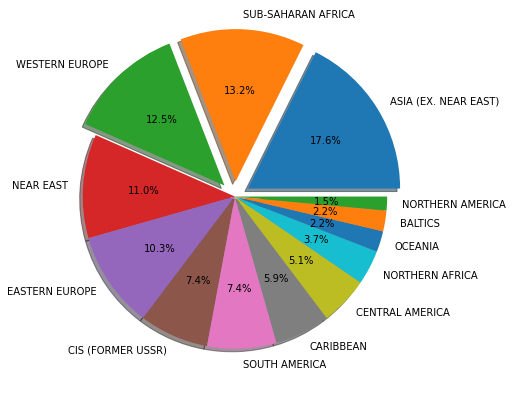

In [24]:
plt.figure(figsize=(9,7))
plt.pie(df['Region'].value_counts(),labels=var,shadow=True,autopct='%1.1f%%',explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0))
plt.show()

* Here we can see :
    * ASIA, SUB-SAHARAN AFRICA, and WESTERN EUROPE are the top 3 Regions having maximum no. of countries.

## Pivot tables

### Regionwise Number of Internet Plans

In [25]:
d1=df.copy()
pivot_1 = d1.pivot_table(
    index=['Region'],
    values=['NO. OF Internet Plans'],sort=('NO. OF Internet Plans'),aggfunc='sum'
)
pivot_1.sort_values(by='NO. OF Internet Plans',ascending=False)

,NO. OF Internet Plans
Region,
ASIA (EX. NEAR EAST),984.0
SUB-SAHARAN AFRICA,636.0
WESTERN EUROPE,582.0
NEAR EAST,491.0
EASTERN EUROPE,402.0
SOUTH AMERICA,395.0
CIS (FORMER USSR),259.0
CENTRAL AMERICA,169.0
NORTHERN AFRICA,125.0


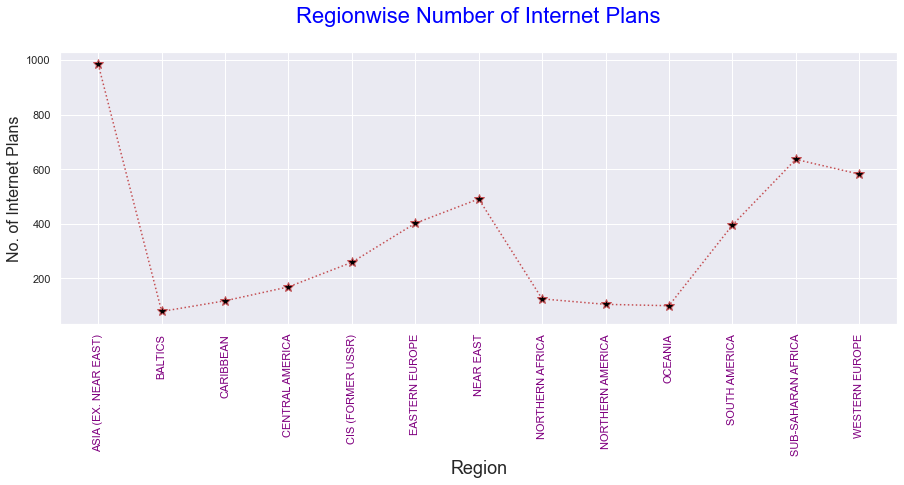

In [26]:
sns.set()
plt.figure(figsize=(15,5))
plt.plot(pivot_1,'*:r',mfc='black',ms=10)
plt.xticks(rotation=90,color='purple')
plt.title('Regionwise Number of Internet Plans\n',color='blue',fontsize=22)
plt.xlabel('Region',fontsize=18)
plt.ylabel('No. of Internet Plans',fontsize=16)
plt.show()

* Asia Region has the maximum no. of internet plans available.

### Regionwise Most Expensive Data

In [27]:
d2=df.copy()
pivot_2 = d2.pivot_table(
    index=['Region'],
    values=['Most expensive 1GB (Rs)'],sort=('Most expensive 1GB (Rs)'),aggfunc='max'
)
pivot_2.sort_values(by='Most expensive 1GB (Rs)',ascending=False).head()

,Most expensive 1GB (Rs)
Region,
WESTERN EUROPE,62463.00
CARIBBEAN,11631.94
ASIA (EX. NEAR EAST),7870.53
EASTERN EUROPE,7830.72
NORTHERN AMERICA,6461.83


* These are the top 5 Most Expensive Internet price Regions.

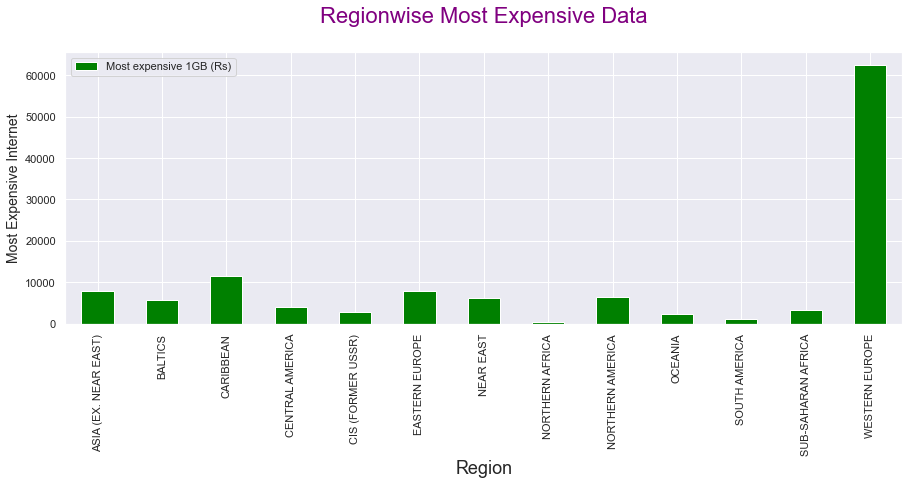

In [28]:
d_=d2.copy()
d_.groupby('Region')[['Most expensive 1GB (Rs)']].max().plot.bar(color='green',figsize=(15,5))
plt.title('Regionwise Most Expensive Data\n',fontsize=22,color='purple')
plt.xlabel('Region',fontsize=18)
plt.ylabel('Most Expensive Internet',fontsize=14)
plt.show()

* From the graph we can say that Weatern Europe has the most expensive data rates.
* Northern America has the least Expensive data rate.

### Regionwise Cheapest monthly Data Rates

In [29]:
d3=df.copy()
pivot_3 = d3.pivot_table(
    index=['Region'],
    values=['Cheapest 1GB for 30 days (Rs)'],sort=('Cheapest 1GB for 30 days (Rs)'),aggfunc='max'
)
pivot_3.sort_values(by='Cheapest 1GB for 30 days (Rs)').head()

,Cheapest 1GB for 30 days (Rs)
Region,
BALTICS,28.43
NORTHERN AFRICA,35.75
CIS (FORMER USSR),70.68
NORTHERN AMERICA,81.24
EASTERN EUROPE,84.49


* These are the top 5 Cheapest Internet price Regions.

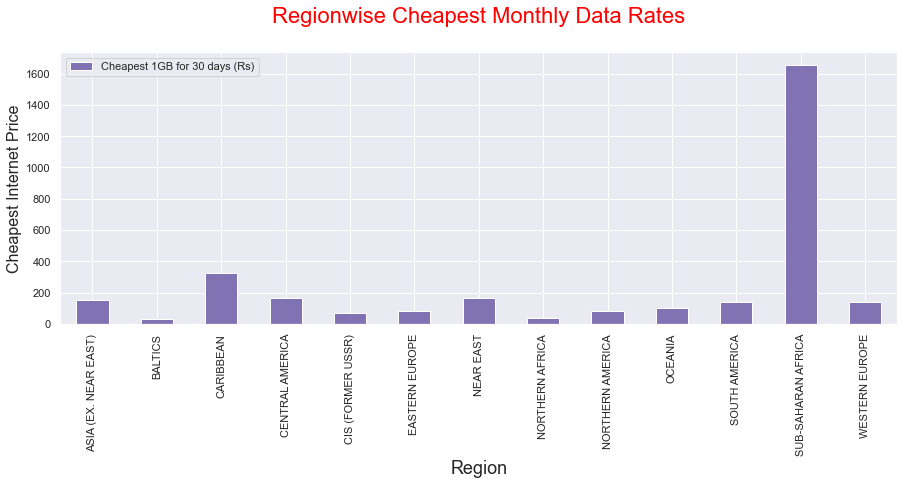

In [30]:
d_1=d3.copy()
d_.groupby('Region')[['Cheapest 1GB for 30 days (Rs)']].max().plot.bar(color='m',figsize=(15,5))
plt.title('Regionwise Cheapest Monthly Data Rates\n',fontsize=22,color='red')
plt.xlabel('Region',fontsize=18)
plt.ylabel('Cheapest Internet Price',fontsize=16)
plt.show()

* From the graph we can say that Baltics has the cheapest 1Gb monthly Internet data rates.
* Sub-Saharan Africa has the most Expensive 1GB monthly data rate.

### Regionwise Average Internet Speed

In [31]:
d4=df.copy()
pivot_4 = d4.pivot_table(
    index=['Region'],
    values=['Avg Speed'],sort=('Avg Speed'),aggfunc='mean'
)
pivot_4.sort_values(by='Avg Speed',ascending = False)

,Avg Speed
Region,
NORTHERN AMERICA,68.150000
WESTERN EUROPE,65.017647
NEAR EAST,53.922667
OCEANIA,50.666667
BALTICS,48.933333
EASTERN EUROPE,48.236429
CARIBBEAN,43.116250
ASIA (EX. NEAR EAST),35.231250
SOUTH AMERICA,21.550000


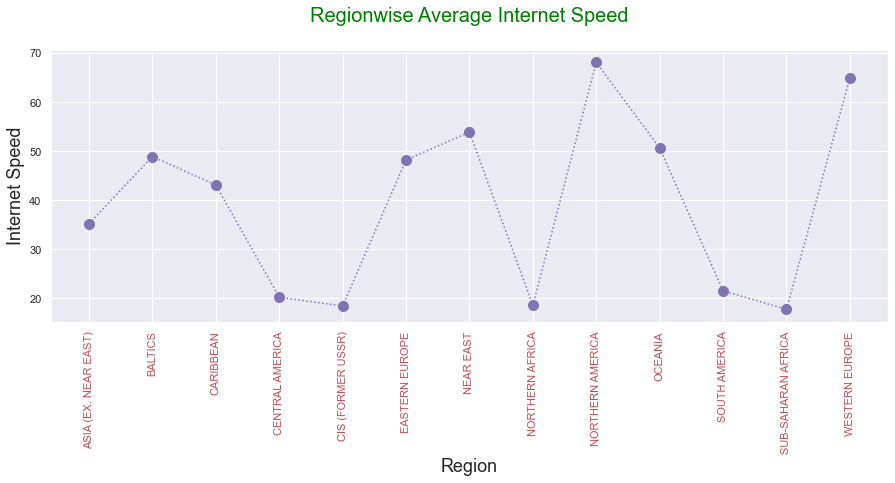

In [32]:
plt.figure(figsize=(15,5))
plt.plot(pivot_4,'o:m',ms=10)
plt.xticks(rotation=90,color='r')
plt.title('Regionwise Average Internet Speed\n',fontsize=20,color='green')
plt.xlabel('Region',fontsize=18)
plt.ylabel('Internet Speed',fontsize=18)
plt.show()

* The average speed offered by each Region.
    * NORTHERN AMERICA Region has the maximum average internet speed.
    * SUB-SAHARAN AFRICA Region has the minimum average internet speed.

### Regionwise Average Price of 1GB year(2020-21)

In [33]:
d5=df.copy()
pivot_5 = d5.pivot_table(
    index=['Region'],
    values=['Average price of 1GB (Rs at start of 2021)','Average price of 1GB (Rs at start of 2020)'],aggfunc='max'
)
pivot_5

,Average price of 1GB (Rs at start of 2020),Average price of 1GB (Rs at start of 2021)
Region,,
ASIA (EX. NEAR EAST),976.5048,99.9252
BALTICS,298.1508,307.8996
CARIBBEAN,451.6944,740.0964
CENTRAL AMERICA,5348.0292,543.4956
CIS (FORMER USSR),73.9284,85.3020
EASTERN EUROPE,935.0724,90.9888
NEAR EAST,916.3872,83.6772
NORTHERN AFRICA,418.3860,88.5516
NORTHERN AMERICA,677.5416,649.9200


* At the start of year 2020, Central America has the Expensive average price of 1GB data.
* At the start of year 2021, Western Europe has the Expensive average price of 1GB data.

### Print the correlation between the features of the dataset

In [34]:
df.corr()

,NO. OF Internet Plans,Cheapest 1GB for 30 days (Rs),Most expensive 1GB (Rs),Internet users,Population,Avg Speed
NO. OF Internet Plans,1.000000,-0.265714,-0.061763,0.235719,0.223501,-0.035881
Cheapest 1GB for 30 days (Rs),-0.265714,1.000000,0.029285,-0.062923,-0.057178,-0.006204
Most expensive 1GB (Rs),-0.061763,0.029285,1.000000,-0.054182,-0.062463,0.155145
Internet users,0.235719,-0.062923,-0.054182,1.000000,0.992015,0.037243
Population,0.223501,-0.057178,-0.062463,0.992015,1.000000,0.001099
Avg Speed,-0.035881,-0.006204,0.155145,0.037243,0.001099,1.000000


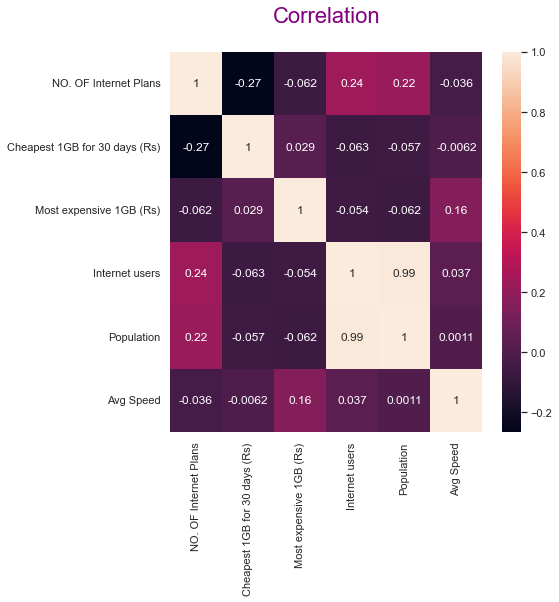

In [35]:
df_cor=df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(df_cor,annot=True)
plt.title('Correlation\n',fontsize=22,color='purple')
plt.show()

* From the above data we can conclude that 'Population' and 'Internet users' are highly correlated to each other.

In [36]:
df['NO. OF Internet Plans'].sum()

4445.0

#   -----------------------* Conclusion *-----------------------
- There were a total of 4445 no. Internet Plans available in the year(2020-21).
- Among all the Regions, Western Europe has the most expensive internet price(in Rs).
- Baltics Region has the cheapest price of internet.
- The max avg. internet speed 135.4(Mbps).
- Whereas the min avg. internet speed was 5.5(Mbps).